# Forex History

In [3]:
import csv
import io
import json
import matplotlib.pyplot as plt
import mplcyberpunk
import pandas
import requests

plt.style.use('cyberpunk')

## Currencies

In [4]:
response = requests.get("https://restcountries.com/v3/all")
countries = response.json()

currencies_dict = {}

for country in countries:
    currencies_by_country = country.get("currencies", {})
    codes = currencies_by_country.keys()
    for code in codes:
        currencies_dict[code] = currencies_by_country.get(code, {})

currencies = []

for code in currencies_dict:
    data = currencies_dict.get(code, {})
    currencies.append({
        "code": code,
        **data,
    })

currencies_data_frame = pandas.DataFrame(currencies)
sorted_currencies_data_frame = currencies_data_frame.sort_values(by="code")
sorted_currencies_data_frame.to_csv("./csv/currencies.csv", index=False, header=True)

## Convert JSONL to CSV

In [5]:
jsonl_file = open("./json/history.jsonl", "r")
jsonl_data = jsonl_file.read()
json_lines = tuple(json_line
                   for json_line in jsonl_data.splitlines()
                   if json_line.strip())
jsons_objs = tuple(json.loads(json_line)
                   for json_line in json_lines)

# write them into a CSV file
string_io = io.StringIO()
writer = csv.writer(string_io)
writer.writerow(["base", "date", "date_id", "rates", "status"])
writer.writerows((value for key, value in sorted(json_obj.items()))
                 for json_obj in jsons_objs)
csv_string = string_io.getvalue()
csv_file = open("./csv/history.csv", "w+")
csv_file.write(csv_string)

4450098

In [6]:
history_data_frame = pandas.read_csv("./csv/history.csv")
history_data_frame

,base,date,date_id,rates,status
0,EUR,1999-01-04,1999-01-04,"{'AUD': 1.91, 'CAD': 1.8004, 'CHF': 1.6168, 'C...",200
1,EUR,1999-01-05,1999-01-05,"{'AUD': 1.8944, 'CAD': 1.7965, 'CHF': 1.6123, ...",200
2,EUR,1999-01-06,1999-01-06,"{'AUD': 1.882, 'CAD': 1.7711, 'CHF': 1.6116, '...",200
3,EUR,1999-01-07,1999-01-07,"{'AUD': 1.8474, 'CAD': 1.7602, 'CHF': 1.6165, ...",200
4,EUR,1999-01-08,1999-01-08,"{'AUD': 1.8406, 'CAD': 1.7643, 'CHF': 1.6138, ...",200
...,...,...,...,...,...
8878,EUR,2023-04-26,2023-04-26,"{'AUD': 1.6725, 'BGN': 1.9558, 'BRL': 5.5739, ...",200
8879,EUR,2023-04-27,2023-04-27,"{'AUD': 1.6672, 'BGN': 1.9558, 'BRL': 5.5532, ...",200
8880,EUR,2023-04-28,2023-04-28,"{'AUD': 1.6664, 'BGN': 1.9558, 'BRL': 5.4872, ...",200
8881,EUR,2023-04-28,2023-04-29,"{'AUD': 1.6664, 'BGN': 1.9558, 'BRL': 5.4872, ...",200


In [7]:
history_2023_04_data_frame = history_data_frame[history_data_frame.date_id.str.contains("2023")]
history_2023_04_data_frame

,base,date,date_id,rates,status
8763,EUR,2022-12-30,2023-01-01,"{'AUD': 1.5693, 'BGN': 1.9558, 'BRL': 5.6386, ...",200
8764,EUR,2023-01-02,2023-01-02,"{'AUD': 1.5699, 'BGN': 1.9558, 'BRL': 5.7048, ...",200
8765,EUR,2023-01-03,2023-01-03,"{'AUD': 1.5708, 'BGN': 1.9558, 'BRL': 5.6656, ...",200
8766,EUR,2023-01-04,2023-01-04,"{'AUD': 1.5452, 'BGN': 1.9558, 'BRL': 5.7758, ...",200
8767,EUR,2023-01-05,2023-01-05,"{'AUD': 1.5515, 'BGN': 1.9558, 'BRL': 5.706, '...",200
...,...,...,...,...,...
8878,EUR,2023-04-26,2023-04-26,"{'AUD': 1.6725, 'BGN': 1.9558, 'BRL': 5.5739, ...",200
8879,EUR,2023-04-27,2023-04-27,"{'AUD': 1.6672, 'BGN': 1.9558, 'BRL': 5.5532, ...",200
8880,EUR,2023-04-28,2023-04-28,"{'AUD': 1.6664, 'BGN': 1.9558, 'BRL': 5.4872, ...",200
8881,EUR,2023-04-28,2023-04-29,"{'AUD': 1.6664, 'BGN': 1.9558, 'BRL': 5.4872, ...",200


In [8]:
x = history_2023_04_data_frame.date_id.values.tolist()
x

['2023-01-01',
 '2023-01-02',
 '2023-01-03',
 '2023-01-04',
 '2023-01-05',
 '2023-01-06',
 '2023-01-07',
 '2023-01-08',
 '2023-01-09',
 '2023-01-10',
 '2023-01-11',
 '2023-01-12',
 '2023-01-13',
 '2023-01-14',
 '2023-01-15',
 '2023-01-16',
 '2023-01-17',
 '2023-01-18',
 '2023-01-19',
 '2023-01-20',
 '2023-01-21',
 '2023-01-22',
 '2023-01-23',
 '2023-01-24',
 '2023-01-25',
 '2023-01-26',
 '2023-01-27',
 '2023-01-28',
 '2023-01-29',
 '2023-01-30',
 '2023-01-31',
 '2023-02-01',
 '2023-02-02',
 '2023-02-03',
 '2023-02-04',
 '2023-02-05',
 '2023-02-06',
 '2023-02-07',
 '2023-02-08',
 '2023-02-09',
 '2023-02-10',
 '2023-02-11',
 '2023-02-12',
 '2023-02-13',
 '2023-02-14',
 '2023-02-15',
 '2023-02-16',
 '2023-02-17',
 '2023-02-18',
 '2023-02-19',
 '2023-02-20',
 '2023-02-21',
 '2023-02-22',
 '2023-02-23',
 '2023-02-24',
 '2023-02-25',
 '2023-02-26',
 '2023-02-27',
 '2023-02-28',
 '2023-03-01',
 '2023-03-02',
 '2023-03-03',
 '2023-03-04',
 '2023-03-05',
 '2023-03-06',
 '2023-03-07',
 '2023-03-

In [9]:
def get_rate(string : str):
    json_object = json.loads(string.replace("'", '"'))
    return json_object

rates = list(map(lambda item: get_rate(item), history_2023_04_data_frame.rates.values.tolist()))
rates

[{'AUD': 1.5693,
  'BGN': 1.9558,
  'BRL': 5.6386,
  'CAD': 1.444,
  'CHF': 0.9847,
  'CNY': 7.3582,
  'CZK': 24.116,
  'DKK': 7.4365,
  'GBP': 0.88693,
  'HKD': 8.3163,
  'HRK': 7.5365,
  'HUF': 400.87,
  'IDR': 16520,
  'ILS': 3.7554,
  'INR': 88.17,
  'ISK': 151.5,
  'JPY': 140.66,
  'KRW': 1344.09,
  'MXN': 20.856,
  'MYR': 4.6984,
  'NOK': 10.5138,
  'NZD': 1.6798,
  'PHP': 59.32,
  'PLN': 4.6808,
  'RON': 4.9495,
  'SEK': 11.1218,
  'SGD': 1.43,
  'THB': 36.835,
  'TRY': 19.9649,
  'USD': 1.0666,
  'ZAR': 18.0986},
 {'AUD': 1.5699,
  'BGN': 1.9558,
  'BRL': 5.7048,
  'CAD': 1.4506,
  'CHF': 0.9873,
  'CNY': 7.3698,
  'CZK': 24.176,
  'DKK': 7.4374,
  'GBP': 0.8863,
  'HKD': 8.3389,
  'HUF': 401.03,
  'IDR': 16632,
  'ILS': 3.7537,
  'INR': 88.43,
  'ISK': 151.7,
  'JPY': 139.62,
  'KRW': 1357.8,
  'MXN': 20.832,
  'MYR': 4.7059,
  'NOK': 10.5135,
  'NZD': 1.6886,
  'PHP': 59.634,
  'PLN': 4.6813,
  'RON': 4.94,
  'SEK': 11.1663,
  'SGD': 1.4324,
  'THB': 36.915,
  'TRY': 20.004,


In [10]:
codes = ["AUD", "CAD", "KRW", "SGD", "USD"]

y_rate = {}

for code in codes:
  code_rates = list(map(lambda item: item.get(code), rates))
  y_rate[code] = code_rates

y_rate

{'AUD': [1.5693,
  1.5699,
  1.5708,
  1.5452,
  1.5515,
  1.559,
  1.559,
  1.559,
  1.5446,
  1.5616,
  1.5588,
  1.557,
  1.5586,
  1.5586,
  1.5586,
  1.5537,
  1.5611,
  1.5413,
  1.5726,
  1.5619,
  1.5619,
  1.5619,
  1.5529,
  1.547,
  1.536,
  1.5308,
  1.5289,
  1.5289,
  1.5289,
  1.539,
  1.5476,
  1.5392,
  1.5407,
  1.5499,
  1.5499,
  1.5499,
  1.5596,
  1.547,
  1.5416,
  1.5409,
  1.5432,
  1.5432,
  1.5432,
  1.5388,
  1.5411,
  1.5529,
  1.55,
  1.556,
  1.556,
  1.556,
  1.5456,
  1.5517,
  1.5576,
  1.5551,
  1.5668,
  1.5668,
  1.5668,
  1.5739,
  1.576,
  1.5776,
  1.5773,
  1.5728,
  1.5728,
  1.5728,
  1.5807,
  1.6002,
  1.5978,
  1.5965,
  1.6064,
  1.6064,
  1.6064,
  1.6066,
  1.6052,
  1.5888,
  1.5932,
  1.5874,
  1.5874,
  1.5874,
  1.5978,
  1.6136,
  1.6132,
  1.6242,
  1.6189,
  1.6189,
  1.6189,
  1.6204,
  1.6219,
  1.6252,
  1.6263,
  1.6268,
  1.6268,
  1.6268,
  1.608,
  1.6154,
  1.6325,
  1.6312,
  1.6312,
  1.6312,
  1.6312,
  1.6312,
  1.6387

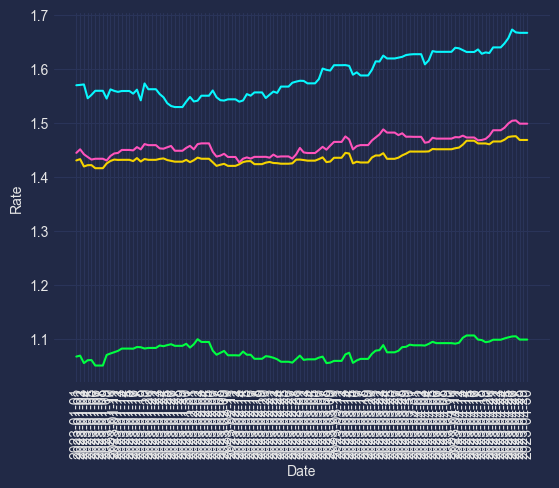

In [11]:
plt.plot(x, y_rate["AUD"])
plt.plot(x, y_rate["CAD"])
plt.plot(x, y_rate["SGD"])
plt.plot(x, y_rate["USD"])
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Rate')
plt.show()